In [1]:
import os
import cv2
import numpy as np
from sklearn.feature_extraction import image as sklearn_image
import pickle
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
%matplotlib inline

In [2]:
def read_image(img_path, size=None):
    img = cv2.imread(img_path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if size:
        assert isinstance(size, tuple), "Size is not in tuple"
        return misc.imresize(img, size)
    return img


def read_label(mask_path, binary=False, size=None):
    img = ndimage.imread(mask_path, mode='L')
    if size:
        assert isinstance(size, tuple), "Size is not in tuple"
        img = misc.imresize(img, size)
    if binary:
        img[img <= 127] = 1
        img[img > 127] = 0
        return img
    return img

def display(img):
    plt.imshow(img,cmap="Greys")
    plt.show()

def extract_patches_2d(image, bounding_box, label, patch_size=(224, 224), max_patches=1):
    x, y, w, h = bounding_box
                                                                                                             
    rand_x, rand_y, w, h = np.random.randint(low=x, high=x+w , size=1)[0], np.random.randint(low=y, high=y+h,size=1)[0], patch_size[0], patch_size[1]
    label_image = label[rand_y:rand_y + h, rand_x:rand_x + w]
    intersection = np.count_nonzero(label_image) * 1.0 / (np.count_nonzero(label_image) + len(np.where(label_image==0)))
    #return label_image,intersection
    return image[rand_y:rand_y + h, rand_x:rand_x + w, :], intersection

def extract_random_patch_from_contour(image, label, patch_size, max_patches, cancer_ratio):
    _, contours, _ = cv2.findContours(label, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    #print bounding_boxes
    images = []
    counter = 0
    while counter < max_patches:
        index = np.random.randint(0, len(bounding_boxes))
        bounding_box_image = bounding_boxes[index]
        x, y, w, h = bounding_box_image
        image_bounding_box = image[y:y + h, x:x + w, :]
        img, intersection = extract_patches_2d(image, bounding_box_image, label, patch_size=patch_size,
                                               max_patches=1)
        #print intersection
        if intersection > cancer_ratio:
            print intersection
            #print "sssss"
            images.append(img)
            counter += 1

    return np.array(images)

In [75]:

def extract_patches_2d(image, bounding_box, label, patch_size=(224, 224), max_patches=1):
    x, y, w, h = bounding_box
    rand_x, rand_y, w, h = np.random.randint(low=x, high=x + w, size=1)[0], \
                           np.random.randint(low=y, high=y + h, size=1)[0], patch_size[0], patch_size[1]
    if (rand_y + h > image.shape[1]):
        rand_y -= (rand_y + h - image.shape[1])
    if (rand_x + w > image.shape[0]):
        rand_x -= (rand_x + w - image.shape[0])

    label_image = label[rand_y:rand_y + h, rand_x:rand_x + w]
    print np.count_nonzero(label_image) ,len(np.where(label_image == 0))
    print label_image.shape
    intersection = np.count_nonzero(label_image) * 1.0 / (224*224)
    # return label_image,intersection
    # print bounding_box
    # print rand_y, rand_x ,h, w
    
    return image[rand_y:rand_y + h, rand_x:rand_x + w, :], intersection,rand_y,rand_x


def extract_random_patch_from_contour(image, label, patch_size, max_patches, cancer_ratio):
    _, contours, _ = cv2.findContours(label, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    images = []
    counter = 0
    while counter < max_patches:
        index = np.random.randint(0, len(bounding_boxes))
        bounding_box_image = bounding_boxes[index]
        x, y, w, h = bounding_box_image
        # image_bounding_box = image[y:y + h, x:x + w, :]
        # display(label)
        img, intersection, rand_y, rand_x = extract_patches_2d(image, bounding_box_image, label, patch_size=patch_size,
                                               max_patches=1)
        print intersection
        if intersection > cancer_ratio:
            images.append(img)
            print label[rand_y:rand_y+224,rand_x:rand_x+224]
            display(label[rand_y:rand_y+224,rand_x:rand_x+224])
            #cv2.rectangle(label,b_label[0],b_label[1],(255,0,0),2)
            counter += 1
    try:

        return np.array(images)
    except:
        traceback.print_exc()

In [61]:
img = read_image("/home/ashwin/Challenge_DataDreams/data/Image/cancer_subset00/2017-06-10_12.27.00.ndpi.16.25405_26702.2048x2048.tiff"
                 )

In [62]:
label =  read_label("/home/ashwin/Challenge_DataDreams/data/result_labels/2017-06-10_12.27.00.ndpi.16.25405_26702.2048x2048.png",True)

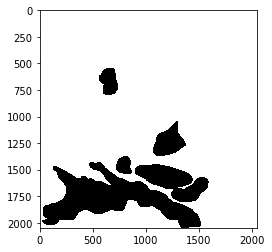

In [6]:
display(label)

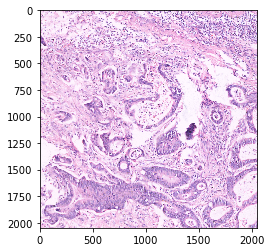

In [52]:
display(img)

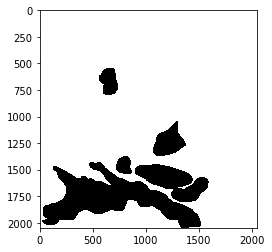

In [53]:
display(label)

28911 2
(244, 224)
0.576191804847
13704 2
(244, 224)
0.273118622449
34029 2
(244, 224)
0.67819276148
4338 2
(244, 224)
0.0864556760204
42102 2
(244, 224)
0.839086415816
43771 2
(244, 224)
0.872349330357
36645 2
(244, 224)
0.730329241071
21482 2
(244, 224)
0.428132971939
28298 2
(244, 224)
0.563974808673
7538 2
(244, 224)
0.150231186224
44687 2
(244, 224)
0.890605070153
37313 2
(244, 224)
0.743642378827
44790 2
(244, 224)
0.892657844388
17402 2
(244, 224)
0.346819196429
18377 2
(244, 224)
0.366250797194
12718 2
(244, 224)
0.253467793367
28511 2
(244, 224)
0.568219866071
43965 2
(244, 224)
0.876215720663
12 2
(244, 224)
0.000239158163265
3497 2
(244, 224)
0.0696946747449
4414 2
(244, 224)
0.0879703443878
41403 2
(244, 224)
0.825155452806
46123 2
(244, 224)
0.919224330357
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


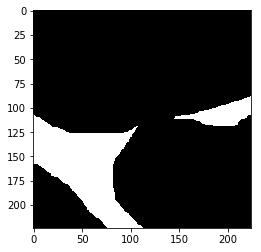

14723 2
(244, 224)
0.29342713648
28536 2
(244, 224)
0.568718112245
9 2
(244, 224)
0.000179368622449
790 2
(244, 224)
0.0157445790816
45349 2
(244, 224)
0.903798628827
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


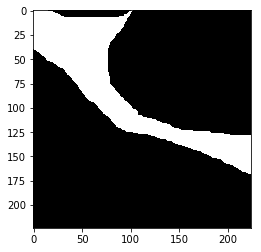

39333 2
(244, 224)
0.783900669643
20207 2
(244, 224)
0.402722417092
20678 2
(244, 224)
0.412109375
26528 2
(244, 224)
0.528698979592
26449 2
(244, 224)
0.527124521684
25018 2
(244, 224)
0.498604910714
1735 2
(244, 224)
0.0345782844388
4326 2
(244, 224)
0.0862165178571
32186 2
(244, 224)
0.641462053571
3070 2
(244, 224)
0.061184630102
31631 2
(244, 224)
0.63040098852
36628 2
(244, 224)
0.729990433673
21728 2
(244, 224)
0.433035714286
32992 2
(244, 224)
0.657525510204
25880 2
(244, 224)
0.515784438776
25133 2
(244, 224)
0.500896843112
6971 2
(244, 224)
0.13893096301
46506 2
(244, 224)
0.926857461735
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]]


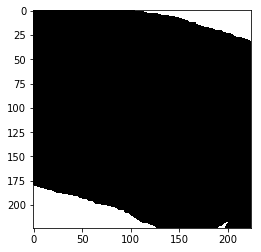

35341 2
(244, 224)
0.704340720663
18347 2
(244, 224)
0.365652901786
260 2
(244, 224)
0.00518176020408
16879 2
(244, 224)
0.33639588648
40139 2
(244, 224)
0.799964126276
31481 2
(244, 224)
0.62741151148
10540 2
(244, 224)
0.210060586735
29308 2
(244, 224)
0.584103954082
36018 2
(244, 224)
0.717833227041
403 2
(244, 224)
0.00803172831633
1894 2
(244, 224)
0.037747130102
23547 2
(244, 224)
0.469288105867
5792 2
(244, 224)
0.115433673469
31874 2
(244, 224)
0.635243941327
37503 2
(244, 224)
0.747429049745
33775 2
(244, 224)
0.673130580357
8358 2
(244, 224)
0.166573660714
7507 2
(244, 224)
0.149613360969
40627 2
(244, 224)
0.809689891582
45292 2
(244, 224)
0.902662627551
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


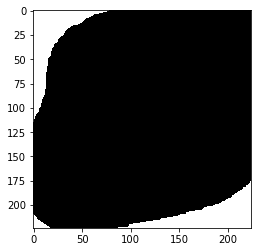

0 2
(244, 224)
0.0
34081 2
(244, 224)
0.67922911352
35701 2
(244, 224)
0.711515465561
20135 2
(244, 224)
0.401287468112
39182 2
(244, 224)
0.780891262755
2399 2
(244, 224)
0.0478117028061
39032 2
(244, 224)
0.777901785714
42474 2
(244, 224)
0.846500318878
55 2
(244, 224)
0.00109614158163
31590 2
(244, 224)
0.629583864796
25016 2
(244, 224)
0.49856505102
37990 2
(244, 224)
0.757134885204
2925 2
(244, 224)
0.0582948022959
38940 2
(244, 224)
0.776068239796
18266 2
(244, 224)
0.364038584184
39627 2
(244, 224)
0.789760044643
33361 2
(244, 224)
0.664879623724
2613 2
(244, 224)
0.052076690051
589 2
(244, 224)
0.0117386798469
25718 2
(244, 224)
0.512555803571
24105 2
(244, 224)
0.480408960459
41691 2
(244, 224)
0.830895248724
40275 2
(244, 224)
0.802674585459
9851 2
(244, 224)
0.196328922194
4137 2
(244, 224)
0.0824497767857
29082 2
(244, 224)
0.579599808673
1213 2
(244, 224)
0.0241749043367
9785 2
(244, 224)
0.195013552296
33549 2
(244, 224)
0.668626434949
27867 2
(244, 224)
0.555385044643
35

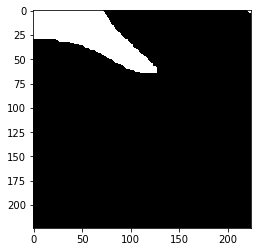

28553 2
(244, 224)
0.569056919643
43576 2
(244, 224)
0.868463010204
28617 2
(244, 224)
0.570332429847
41472 2
(244, 224)
0.826530612245
27291 2
(244, 224)
0.543905452806
2824 2
(244, 224)
0.0562818877551
26588 2
(244, 224)
0.529894770408
2497 2
(244, 224)
0.0497648278061
38586 2
(244, 224)
0.76901307398
12219 2
(244, 224)
0.243522799745
44466 2
(244, 224)
0.88620057398
27176 2
(244, 224)
0.541613520408
11524 2
(244, 224)
0.229671556122
1888 2
(244, 224)
0.0376275510204
47196 2
(244, 224)
0.940609056122
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]]


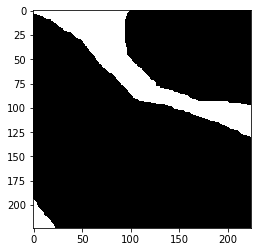

5985 2
(244, 224)
0.119280133929
9060 2
(244, 224)
0.180564413265
30065 2
(244, 224)
0.599190848214
21350 2
(244, 224)
0.425502232143
37918 2
(244, 224)
0.755699936224
5382 2
(244, 224)
0.107262436224
6853 2
(244, 224)
0.136579241071
44237 2
(244, 224)
0.881636639031
29220 2
(244, 224)
0.582350127551
40744 2
(244, 224)
0.812021683673
41686 2
(244, 224)
0.83079559949
333 2
(244, 224)
0.00663663903061
39548 2
(244, 224)
0.788185586735
40963 2
(244, 224)
0.816386320153
20310 2
(244, 224)
0.404775191327
23234 2
(244, 224)
0.463050063776
44908 2
(244, 224)
0.895009566327
8233 2
(244, 224)
0.164082429847
14933 2
(244, 224)
0.297612404337
41436 2
(244, 224)
0.825813137755
47353 2
(244, 224)
0.943738042092
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


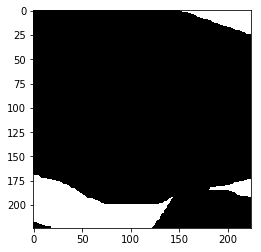

4462 2
(244, 224)
0.0889269770408
1141 2
(244, 224)
0.0227399553571
172 2
(244, 224)
0.00342793367347
44353 2
(244, 224)
0.883948501276
43539 2
(244, 224)
0.867725605867
33709 2
(244, 224)
0.671815210459
33881 2
(244, 224)
0.675243144133
32214 2
(244, 224)
0.642020089286
22455 2
(244, 224)
0.44752471301
41733 2
(244, 224)
0.831732302296
30731 2
(244, 224)
0.612464126276
59 2
(244, 224)
0.00117586096939
3474 2
(244, 224)
0.0692362882653
47014 2
(244, 224)
0.93698182398
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


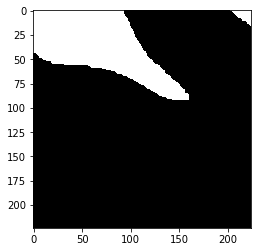

18168 2
(244, 224)
0.362085459184
29630 2
(244, 224)
0.590521364796
6599 2
(244, 224)
0.131517059949
41511 2
(244, 224)
0.827307876276
37527 2
(244, 224)
0.747907366071
39483 2
(244, 224)
0.786890146684
325 2
(244, 224)
0.0064772002551
145 2
(244, 224)
0.00288982780612
39064 2
(244, 224)
0.778539540816
5023 2
(244, 224)
0.100107621173
2159 2
(244, 224)
0.0430285395408
20246 2
(244, 224)
0.403499681122
30535 2
(244, 224)
0.608557876276
8753 2
(244, 224)
0.174445950255
9716 2
(244, 224)
0.193638392857
3932 2
(244, 224)
0.0783641581633
12017 2
(244, 224)
0.239496970663
5495 2
(244, 224)
0.109514508929
2191 2
(244, 224)
0.0436662946429
8857 2
(244, 224)
0.176518654337
9342 2
(244, 224)
0.186184630102
1515 2
(244, 224)
0.0301937181122
7083 2
(244, 224)
0.141163105867
0 2
(244, 224)
0.0
25991 2
(244, 224)
0.517996651786
422 2
(244, 224)
0.00841039540816
21195 2
(244, 224)
0.422413105867
24603 2
(244, 224)
0.490334024235
40746 2
(244, 224)
0.812061543367
45287 2
(244, 224)
0.902562978316
[[1 

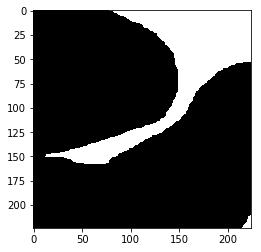

12564 2
(244, 224)
0.250398596939
7177 2
(244, 224)
0.14303651148
19005 2
(244, 224)
0.378766741071
43080 2
(244, 224)
0.858577806122
20459 2
(244, 224)
0.40774473852
37246 2
(244, 224)
0.742307079082
23668 2
(244, 224)
0.471699617347
1761 2
(244, 224)
0.0350964604592
38600 2
(244, 224)
0.769292091837
15392 2
(244, 224)
0.306760204082
32424 2
(244, 224)
0.646205357143
39049 2
(244, 224)
0.778240593112
3017 2
(244, 224)
0.0601283482143
5814 2
(244, 224)
0.115872130102
23912 2
(244, 224)
0.4765625
34699 2
(244, 224)
0.691545758929
36859 2
(244, 224)
0.734594228316
50629 2
(244, 224)
1.00902822066
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


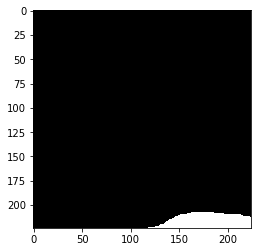

In [76]:
p = extract_random_patch_from_contour(img,label,(224,244
                                                 ),10
                                      ,
                                      0.9)

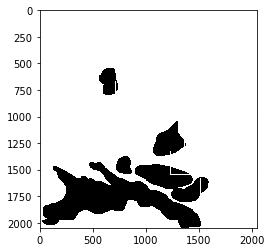

In [39]:
display(label*255)

In [122]:
label[0,0]

0